In [2]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

from torch_geometric.data import Data, Dataset
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt
import rdkit
from rdkit import Chem
from rdkit.Chem.rdchem import Mol, HybridizationType, BondType
from ogb.utils.features import atom_to_feature_vector, bond_to_feature_vector

In [2]:
ls ../sdf/

mol_100071.sdf  mol_155576.sdf  mol_217387.sdf  mol_268202.sdf  mol_44900.sdf
mol_101372.sdf  mol_157394.sdf  mol_21800.sdf   mol_268542.sdf  mol_45225.sdf
mol_101795.sdf  mol_157970.sdf  mol_218301.sdf  mol_268672.sdf  mol_45405.sdf
mol_101915.sdf  mol_158733.sdf  mol_218565.sdf  mol_268774.sdf  mol_45900.sdf
mol_102321.sdf  mol_159039.sdf  mol_219115.sdf  mol_268868.sdf  mol_45939.sdf
mol_103251.sdf  mol_159049.sdf  mol_2195.sdf    mol_268887.sdf  mol_4650.sdf
mol_10330.sdf   mol_159285.sdf  mol_220088.sdf  mol_269727.sdf  mol_47262.sdf
mol_103430.sdf  mol_16001.sdf   mol_220291.sdf  mol_270147.sdf  mol_47417.sdf
mol_103699.sdf  mol_160391.sdf  mol_220567.sdf  mol_270152.sdf  mol_47972.sdf
mol_104416.sdf  mol_160744.sdf  mol_220874.sdf  mol_270449.sdf  mol_48008.sdf
mol_105092.sdf  mol_16112.sdf   mol_221492.sdf  mol_270663.sdf  mol_48464.sdf
mol_105528.sdf  mol_16121.sdf   mol_222057.sdf  mol_271040.sdf  mol_49189.sdf
mol_105966.sdf  mol_161843.sdf  mol_222568.sdf  mol_271373.sdf  m

In [56]:
suppl = Chem.SDMolSupplier('../sdf/mol_100071.sdf')


In [133]:
t[(t['len'] < 20) & (t.mol_id.astype(str).isin(set(sdfs)))].sort_values('len').tail(10)

,mol_id,smiles,pass_size,n_heavy_atoms,pass_element,broken,qed,sa,error_mol,len
200437,200437,O=C(O)CCC(=O)C(=O)O,True,10,True,False,0.521625,0.88,False,19
288166,288166,NCCc1c[nH]c2ccccc12,True,12,True,False,0.689024,0.91,False,19
56625,56625,O=c1[nH]cnc2ccccc12,True,11,True,False,0.600351,0.89,False,19
65815,65815,NS(=O)(=O)Oc1ccccc1,True,11,True,False,0.697392,0.92,False,19
281224,281224,CCCCCCCCCCCCCC(=O)O,True,16,True,False,0.488351,0.93,False,19
83186,83186,O=C(O)c1cc2ccccc2s1,True,12,True,False,0.728317,0.91,False,19
120563,120563,CN(C)NC(=O)CCC(=O)O,True,11,True,False,0.540941,0.86,False,19
233640,233640,OCCc1c[nH]c2ccccc12,True,12,True,False,0.690602,0.91,False,19
282048,282048,CCCCCCCCCCCCCCCCCCO,True,19,True,False,0.329061,0.94,False,19
230499,230499,Cc1[nH]nc2cn[nH]c12,True,9,True,False,0.537022,0.75,False,19


In [130]:
p = 22744
suppl = Chem.SDMolSupplier('../sdf/mol_{}.sdf'.format(p))
molecule = suppl[0]

In [131]:
# SMILES表記を取得
smiles = Chem.MolToSmiles(molecule)
smiles

'O=C1NCCc2[nH]c(-c3ccncc3)cc21'

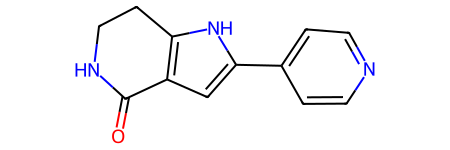

In [132]:
suppl[0]

In [114]:
Draw.MolToFile(molecule, 'molecule_2d.png')

In [46]:
t = pd.read_csv('../geom_drug/mol_summary.csv', index_col=0)
t = t.dropna()
t['len'] = [len(i) for i in t.smiles]
t[t['len'] < 20]

,mol_id,smiles,pass_size,n_heavy_atoms,pass_element,broken,qed,sa,error_mol,len
35,35,CCN1C(=O)C=CC1=O,True,9,True,False,0.459920,0.82,False,16
439,439,CCc1ccccc1NC(=S)NN,True,13,True,False,0.379245,0.89,False,18
488,488,Nc1ccc(Br)cc1Br,True,9,False,False,0.704558,0.89,False,15
650,650,COc1ccc(C=O)c(OC)c1,True,12,True,False,0.638385,0.92,False,19
1124,1124,Nc1nnc(N2CCCCC2)s1,True,12,True,False,0.710043,0.85,False,18
...,...,...,...,...,...,...,...,...,...,...
303118,303118,CC(=O)NCCSCCNC(C)=O,True,13,True,False,0.598372,0.87,False,19
303497,303497,CCCCCCCCc1nnc(N)s1,True,14,True,False,0.708256,0.87,False,18
303681,303681,CCN1CCC(C(N)=O)CC1,True,11,True,False,0.620655,0.91,False,18
303899,303899,O=C1CCCN1,False,6,True,False,0.436836,0.85,False,9


In [3]:
smiles = 'CC(=O)NC1=CC=CC=C1'

# Convert SMILES to a molecule object
mol = Chem.MolFromSmiles(smiles)

# Draw the molecule
img = Draw.MolToImage(mol, size=(300, 300))

# Save the image
img_path = 'molecule_image.png'
img.save(img_path)

img_path

'molecule_image.png'

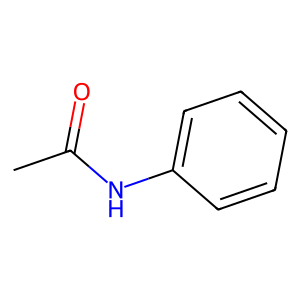

In [4]:
img

In [7]:
import py3Dmol

def MolTo3DView(mol, size=(300, 300), style="stick", surface=False, opacity=0.5):
    assert style in ('line', 'stick', 'sphere', 'carton')
    mblock = Chem.MolToMolBlock(mol)
    viewer = py3Dmol.view(width=size[0], height=size[1])
    viewer.addModel(mblock, 'mol')
    viewer.setStyle({style:{}})
    if surface:
        viewer.addSurface(py3Dmol.SAS, {'opacity': opacity})
    viewer.zoomTo()
    return viewer

In [12]:
def smi2conf(smiles):
    '''Convert SMILES to rdkit.Mol with 3D coordinates'''
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        mol = Chem.AddHs(mol)
        AllChem.EmbedMolecule(mol)
        AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
        return mol
    else:
        return None

conf = smi2conf(smiles)
viewer = MolTo3DView(conf, size=(600, 300), style='stick')
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

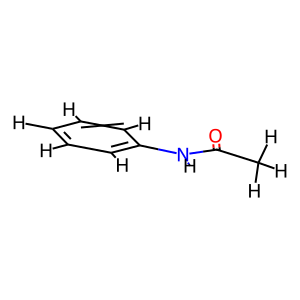

In [14]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import MolToImage

conf = smi2conf(smiles)

# Generate an image from the 2D structure
img = MolToImage(conf)

# Save the image as a transparent PNG
img_path = 'molecule_image.png'
img.save(img_path, format='PNG', transparent=True)
img

In [21]:
def get_drug_graph(mol, smiles=None):
    suppl = Chem.SDMolSupplier(mol)
    mol = suppl[0]
    position = (mol.GetConformer().GetPositions())
    N = mol.GetNumAtoms()
    atomic_number = []
    atom_features_list = []
    
    for atom in mol.GetAtoms():
        
        atomic_number.append(atom.GetAtomicNum())
        atom_feature = atom_to_feature_vector(atom) #for Graph MVP
        atom_features_list.append(atom_feature) #for Graph MVP

    z = torch.tensor(atomic_number, dtype=torch.long)
    x = torch.tensor(np.array(atom_features_list), dtype=torch.long)
    
    row, col = [], []
    edges_list = []
    edge_features_list = []

    for bond in mol.GetBonds():

        start, end = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
        row += [start, end]
        col += [end, start]
        edge_feature = bond_to_feature_vector(bond)
        edge_features_list.append(edge_feature)
        edge_features_list.append(edge_feature)

    edge_attr = torch.tensor(np.array(edge_features_list), dtype=torch.long)
    edge_index = torch.tensor([row, col], dtype=torch.long)

    perm = (edge_index[0] * N + edge_index[1]).argsort()
    edge_index = edge_index[:, perm]
    position = torch.tensor(position, dtype=torch.long)

    if smiles is None:
        smiles = Chem.MolToSmiles(mol)

    data = Data(x=x, atom_type=z, edge_index=edge_index, edge_attr = edge_attr, pos=position)

    return data
    
#     nodes = pd.DataFrame([[
#         a.GetAtomicNum(), a.GetDegree(), a.GetHybridization(), a.GetIsAromatic(), a.GetFormalCharge()
#     ] for a in mol.GetAtoms()])

#     atom_type = np.array([a.GetAtomicNum() for a in mol.GetAtoms()])
    
#     bonds = [(
#         bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), bond.GetBondType(), bond.GetStereo(), 
#     ) for bond in mol.GetBonds()]
#     bonds = pd.DataFrame(bonds).values

#     edges = bonds[:, :2]
#     edges_attr = bonds[:, 2:]

#     node_features = torch.Tensor(nodes.values.astype(int))
#     atom_type = torch.Tensor(atom_type.astype(int))
#     edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
#     edges_attr = torch.tensor(edges_attr, dtype=torch.long)
#     position = torch.tensor(position, dtype=torch.long)
#     data = Data(x=node_features, edge_index=edge_index, edge_attr=edges_attr, pos=position, atom_type=atom_type)
#     return data

In [22]:
drugs = !ls ../sdf/
drugs

['mol_100071.sdf',
 'mol_101372.sdf',
 'mol_101795.sdf',
 'mol_101915.sdf',
 'mol_102321.sdf',
 'mol_103251.sdf',
 'mol_10330.sdf',
 'mol_103430.sdf',
 'mol_103699.sdf',
 'mol_104416.sdf',
 'mol_105092.sdf',
 'mol_105528.sdf',
 'mol_105966.sdf',
 'mol_106117.sdf',
 'mol_106414.sdf',
 'mol_106976.sdf',
 'mol_107211.sdf',
 'mol_107805.sdf',
 'mol_108795.sdf',
 'mol_108878.sdf',
 'mol_109269.sdf',
 'mol_10941.sdf',
 'mol_109664.sdf',
 'mol_109895.sdf',
 'mol_110305.sdf',
 'mol_110313.sdf',
 'mol_110511.sdf',
 'mol_110590.sdf',
 'mol_1108.sdf',
 'mol_111526.sdf',
 'mol_112213.sdf',
 'mol_114539.sdf',
 'mol_115206.sdf',
 'mol_115721.sdf',
 'mol_115784.sdf',
 'mol_115970.sdf',
 'mol_116115.sdf',
 'mol_116270.sdf',
 'mol_116404.sdf',
 'mol_116909.sdf',
 'mol_117162.sdf',
 'mol_117201.sdf',
 'mol_117282.sdf',
 'mol_11733.sdf',
 'mol_117909.sdf',
 'mol_118252.sdf',
 'mol_118711.sdf',
 'mol_118889.sdf',
 'mol_118953.sdf',
 'mol_119076.sdf',
 'mol_11943.sdf',
 'mol_119641.sdf',
 'mol_119829.sdf',

In [23]:
drug_graphs = {}
errors = []
for i in drugs:
    try:
        drug_graphs[i.split('.')[0]] = get_drug_graph('../sdf/'+i)
    except:
        errors.append(i)

[10:37:15] Warning: molecule is tagged as 3D, but all Z coords are zero
[10:37:16] Warning: molecule is tagged as 3D, but all Z coords are zero
[10:37:16] Warning: molecule is tagged as 3D, but all Z coords are zero
[10:37:16] Warning: molecule is tagged as 3D, but all Z coords are zero
[10:37:16] Warning: molecule is tagged as 3D, but all Z coords are zero
[10:37:16] Warning: molecule is tagged as 3D, but all Z coords are zero
[10:37:17] Warning: molecule is tagged as 3D, but all Z coords are zero
[10:37:17] Warning: molecule is tagged as 3D, but all Z coords are zero
[10:37:17] Warning: molecule is tagged as 3D, but all Z coords are zero


In [24]:
drug_graphs

{'mol_100071': Data(x=[41, 9], edge_index=[2, 90], edge_attr=[90, 3], pos=[41, 3], atom_type=[41]),
 'mol_101372': Data(x=[33, 9], edge_index=[2, 74], edge_attr=[74, 3], pos=[33, 3], atom_type=[33]),
 'mol_101795': Data(x=[17, 9], edge_index=[2, 40], edge_attr=[40, 3], pos=[17, 3], atom_type=[17]),
 'mol_101915': Data(x=[22, 9], edge_index=[2, 48], edge_attr=[48, 3], pos=[22, 3], atom_type=[22]),
 'mol_102321': Data(x=[34, 9], edge_index=[2, 74], edge_attr=[74, 3], pos=[34, 3], atom_type=[34]),
 'mol_103251': Data(x=[38, 9], edge_index=[2, 84], edge_attr=[84, 3], pos=[38, 3], atom_type=[38]),
 'mol_10330': Data(x=[25, 9], edge_index=[2, 56], edge_attr=[56, 3], pos=[25, 3], atom_type=[25]),
 'mol_103430': Data(x=[16, 9], edge_index=[2, 34], edge_attr=[34, 3], pos=[16, 3], atom_type=[16]),
 'mol_103699': Data(x=[21, 9], edge_index=[2, 48], edge_attr=[48, 3], pos=[21, 3], atom_type=[21]),
 'mol_104416': Data(x=[21, 9], edge_index=[2, 46], edge_attr=[46, 3], pos=[21, 3], atom_type=[21]),
 

In [25]:
len(errors)

0

In [26]:
errors

[]

In [27]:
import json
import gzip
import zlib
import pickle

In [28]:
with gzip.open('drug.pkl.gz', 'wb') as f:
    pickle.dump(drug_graphs, f)